In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers, datasets
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import SGD

# Building GoogleNet

In [0]:
mnist_shape = (28,28,1)
mnist_classes = 10

In [0]:
input = Input(shape=mnist_shape)

model = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu', input_shape=mnist_shape)(input)
model = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(model)

model = Conv2D(64, (1, 1), activation='relu')(model)
model = Conv2D(192, (3, 3), padding='same', activation='relu')(model)
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(64, (1, 1), activation='relu')(model)
tower_2 = Conv2D(96, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(16, (1, 1), activation='relu')(model)
tower_3 = Conv2D(32, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(32, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(192, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(96, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(192, (1, 1), activation='relu')(model)
tower_2 = Conv2D(96, (1, 1), activation='relu')(model)
tower_2 = Conv2D(208, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(16, (1, 1), activation='relu')(model)
tower_3 = Conv2D(48, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(112, (1, 1), activation='relu')(model)
tower_2 = Conv2D(224, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(24, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(256, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(24, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(112, (1, 1), activation='relu')(model)
tower_2 = Conv2D(144, (1, 1), activation='relu')(model)
tower_2 = Conv2D(288, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(256, (1, 1), activation='relu')(model)
tower_2 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(320, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(256, (1, 1), activation='relu')(model)
tower_2 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(320, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(384, (1, 1), activation='relu')(model)
tower_2 = Conv2D(192, (1, 1), activation='relu')(model)
tower_2 = Conv2D(384, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(48, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = AveragePooling2D((1,1), strides=1, padding='valid')(model)

model = Flatten()(model)
model = Dropout(0.4)(model)
model = Dense(mnist_classes, activation='linear')(model)
output = Dense(mnist_classes, activation='softmax')(model)

model = Model(input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 14, 14, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Implementation of Models on Datasets

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

## MNIST

In [0]:
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data(path='mnist.npz')

# Normalize pixel values to be between 0 and 1
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

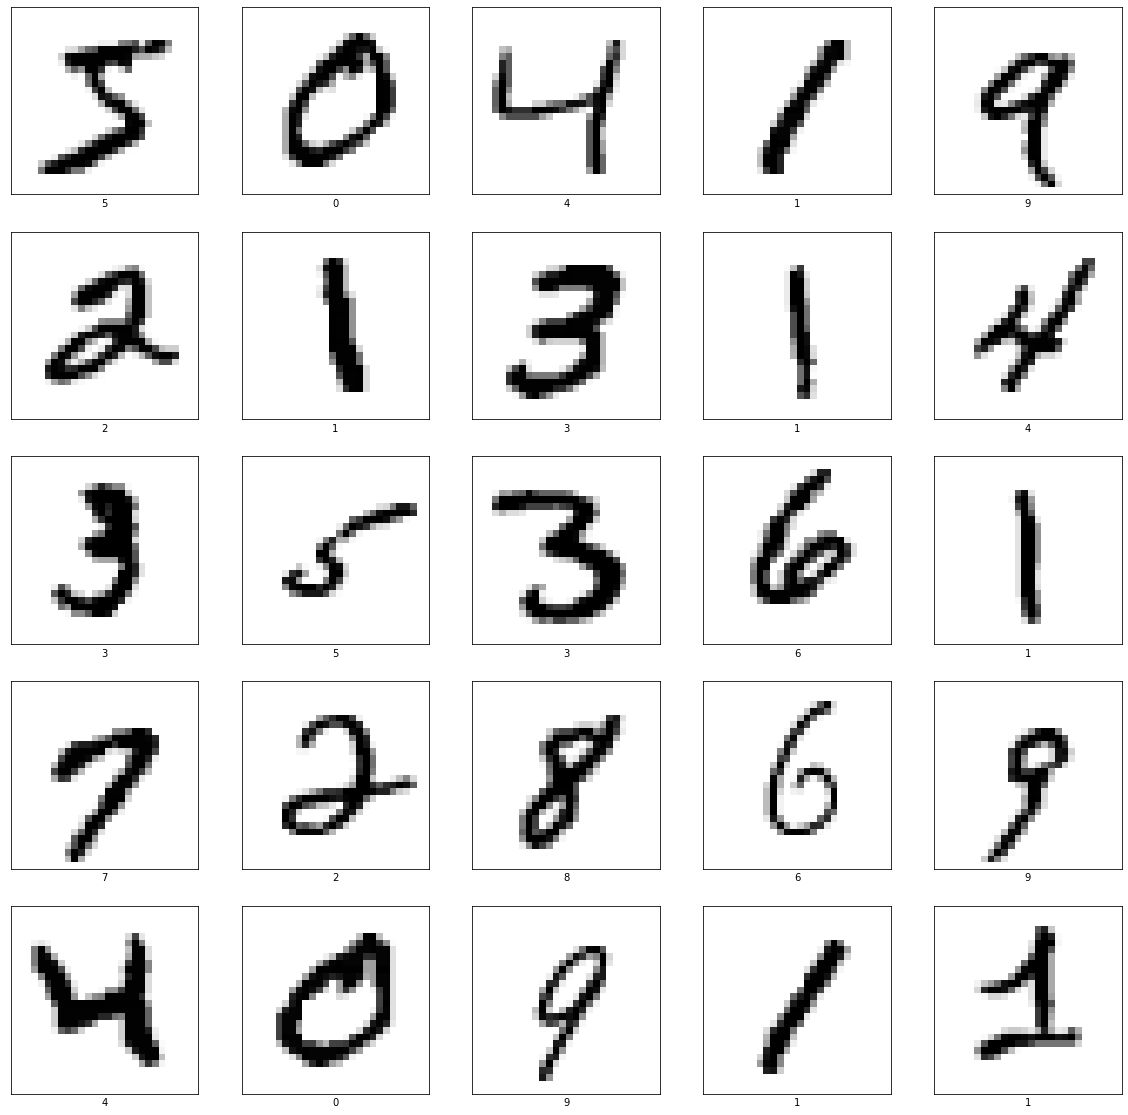

In [0]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_mnist[i]])
plt.show()

In [0]:
# reshape dataset to have a single channel
train_images_mnist = train_images_mnist.reshape((train_images_mnist.shape[0], 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((test_images_mnist.shape[0], 28, 28, 1))

# print(train_images_mnist.shape)
# print(test_images_mnist)
print('test_images_mnist:', test_images_mnist.shape)
print('test_labels_mnist:', test_labels_mnist.shape)


test_images_mnist: (10000, 28, 28, 1)
test_labels_mnist: (10000,)


In [0]:
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images_mnist, 
                      train_labels_mnist, 
                      batch_size=256,
                      epochs=200,
                      validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/100
235/235 [==============================] - 12s 53ms/step - loss: 2.0330 - accuracy: 0.4175 - val_loss: 2.2530 - val_accuracy: 0.1754
Epoch 2/100
235/235 [==============================] - 11s 46ms/step - loss: 1.6105 - accuracy: 0.8511 - val_loss: 1.6259 - val_accuracy: 0.8519
Epoch 3/100
235/235 [==============================] - 11s 46ms/step - loss: 1.5159 - accuracy: 0.9473 - val_loss: 1.5143 - val_accuracy: 0.9484
Epoch 4/100
235/235 [==============================] - 11s 46ms/step - loss: 1.4890 - accuracy: 0.9729 - val_loss: 1.4962 - val_accuracy: 0.9665
Epoch 5/100
235/235 [==============================] - 11s 46ms/step - loss: 1.4833 - accuracy: 0.9786 - val_loss: 1.4889 - val_accuracy: 0.9721
Epoch 6/100
235/235 [==============================] - 11s 46ms/step - loss: 1.4809 - accuracy: 0.9808 - val_loss: 1.4815 - val_accuracy: 0.9791
Epoch 7/100
235/235 [==============================] - 11s 46ms/step - loss: 1.4787 - accuracy: 0.9829 - val_loss: 1.4884 - val_ac

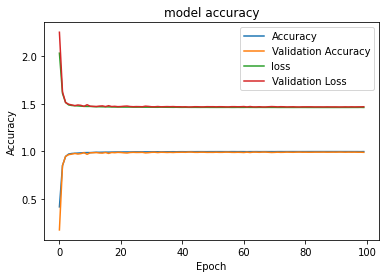

In [0]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()